# Sentiment Analysis Basis Code 

In this sentiment analysis we will use something called functions, which are a block of code that only runs when it is explicitly "called." It is useful when repeating the same task. In this way, we will only need to write one line of code to "call" each function instead of re-writing a whole block of code.  

### Basic structure of a function 

Note: Anything after "#" is a comment, which will have a blue-green color. It does not affect the code, which is in black and other colors. 

In [ ]:
def function_name(parameters):
    
    #Body of function 
    
    return result

As we can see the example above, the basic structure starts with the keyword "def" followed by the function's name and a parenthesis with any parameters (input elements; essentially, what you change when calling the function). The line concludes with a colon ":"

The body of the function is indented; the "return" statement allows the function to send back a result or value. 

Here is an another example below. In this example, we add three to a number, in this case, represented by the letter x.  

In [1]:
def add(x):
    
    y = x + 3
    
    return y 

Now, let's see how to call a function and how to add the parameters. 

Simply write the name of the function and then the parameters in parenthesis, like in the examples below.

In [2]:
add(1)

4

In [3]:
add(10)

13

By changing the parameters, we can see that the result changes accordingly.

Now that you have a basic undertanding of functions and how they work, we can dive into the code. 

### The Code

For this code, the functions are already called, you only have to change the parameters inside the parentheses. 

In [4]:
#This code imports a library called csv, from that, we can read a csv file.
import csv

#sentiment analysis library
import nltk

#sentiment analyzer inside of nltk 
nltk.download('vader_lexicon')

#importing a module inside of nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

#creates and manipulates databases
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annakarolynepereira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
def creates_dataframe(file, column_name):

    #Creates a list. A list can be created by writing the name of a variable (any name can be used)
    #We will store our csv file here, each row of the csv file will be read and stored in a different
    #component of the list. 

    lst = []

    #Opens csv file, reads the file, and then attaches each row from the desired column, in this case "reviewText."

    with open(file, encoding = 'utf8') as csvfile:
        reader = csv.DictReader(csvfile)
        for element in reader:
            lst.append(element[column_name])

    #Initializing an instance of the module we imported, now, we can use "sia" to use the module.
    sia = SIA ()

    #Creating a list with the results 
    results = []

    #Goes through each element in the list with the qualitative data.
    for x in lst:
            #Creates a dictionary (a "key", followed by values) with the polarity scores 
            pol_score = sia.polarity_scores(x)
            #Adds the original line of text to the dictionary 
            pol_score['lst'] = x
            #Adds to the "results" list 
            results.append(pol_score)


    #Creates a dataframe
    df = pd.DataFrame.from_records(results)

    #Creates a column called "label," and then gives each different scores

    #First gives all the value 0 (neutral)
    df['label'] = 0

    #Then if the compoud is 0.2 or more, considers the label as positive (1)
    df.loc[df['compound']> 0.2, 'label'] = 1

    #If the compound is less than -0.2, considers the label as negative (-1)
    df.loc[df['compound']<-0.2, 'label']= -1

    #Returns the dataframe
    return df

In [6]:
def bar_graph(df, title):

    #The lines below create a graph with the results

    #Sets up figure-size
    fig, ax = plt.subplots(figsize=(8,8))

    #Sets up to show data as percentage 
    counts = df.label.value_counts(normalize=True)* 100

    #Sets up axis, color, and grid-style
    sns.barplot(x=counts.index, y=counts, ax=ax, color = 'red').set(title= title)
    sns.set_style('whitegrid')

    #Adds lables to graph
    ax.set_xticklabels(['Negative', 'Neutral','Positive'])
    ax.set_ylabel("Percentage ")


    return plt.show()

In [7]:
def counts(df, column):
    
    #Returns how much positive (1), negative (-1), and neutral (0) data there is.
    return df[column].value_counts()

In [8]:
def percentage(df, column):

    #Returns how much positive (1), negative (-1), and neutral (0) data there is as a percentage.
    return df[column].value_counts(normalize=True)*100

In [9]:
#If you would like to see how the sentiment analyzer categorizes each comment,
#You can use this code to see the top comments in the category desired 

#Parameters: dataframe, column in which conotations are stored, column in which comments are stored, conotation
#(-1, 0, or 1), number of how many top comments you'd like to see 
def print_top_comments(df, column, column2, conotation, number):
    
    #Here we create another dataframe, one with only the number of results we'd like to see
    filtered_df = df[df[column] == conotation].head(number)
    
    #We go through each comment in the list and print it,
    #Adding a "-" in front so it will be easier to see when one ends
    for comment in filtered_df[column2]:
        print('-' + comment)

In [10]:
#Parameters: dataframe, column in which conotations are stored, column in which comments are stored, conotation
#(-1, 0, or 1), number of how many top comments you'd like to see, name you'd like your file to have 

def save_top_comments_to_file(df, column, column2, conotation, number, file_path):
    #Opens and creates a txt file to store the data
    with open(file_path, 'a') as file:
        #Here we create another dataframe, one with only the number of results we'd like to see
        filtered_df = df[df[column] == conotation].head(number)
        
        # We go through each comment in the list and write it to the file
        #Adding a "-" in front so it will be easier to see when one ends
        for comment in filtered_df[column2]:
            file.write('-' + comment + '\n')

In [11]:
#Calls the "creates_dataframe" function, and then stores it into a variable so we can use it throughout the code
#Please, change the name of the csv file to your csv file added to Jupyter Notebooks, and the name of the column 
#you would like to add afterwards

df = creates_dataframe('amazon_reviews.csv', 'reviewText')

#Displays the dataframe 
df

,neg,neu,pos,compound,lst,label
0,0.688,0.312,0.000,-0.2960,No issues.,-1
1,0.075,0.925,0.000,-0.2960,"Purchased this for my device, it worked as adv...",-1
2,0.077,0.923,0.000,-0.3089,it works as expected. I should have sprung for...,-1
3,0.000,0.909,0.091,0.7081,This think has worked out great.Had a diff. br...,1
4,0.038,0.835,0.127,0.7087,"Bought it with Retail Packaging, arrived legit...",1
...,...,...,...,...,...,...
4910,0.091,0.817,0.092,0.0018,I bought this Sandisk 16GB Class 10 to use wit...,0
4911,0.000,0.939,0.061,0.1761,Used this for extending the capabilities of my...,0
4912,0.000,0.828,0.172,0.8588,Great card that is very fast and reliable. It ...,1
4913,0.000,0.802,0.198,0.4939,Good amount of space for the stuff I want to d...,1


In [12]:
#Calls the function "counts"
counts(df, 'label')

 1    3522
-1     714
 0     679
Name: label, dtype: int64

In [13]:
#Calls the function "percentage"
percentage(df, 'label')

 1    71.658189
-1    14.526958
 0    13.814852
Name: label, dtype: float64

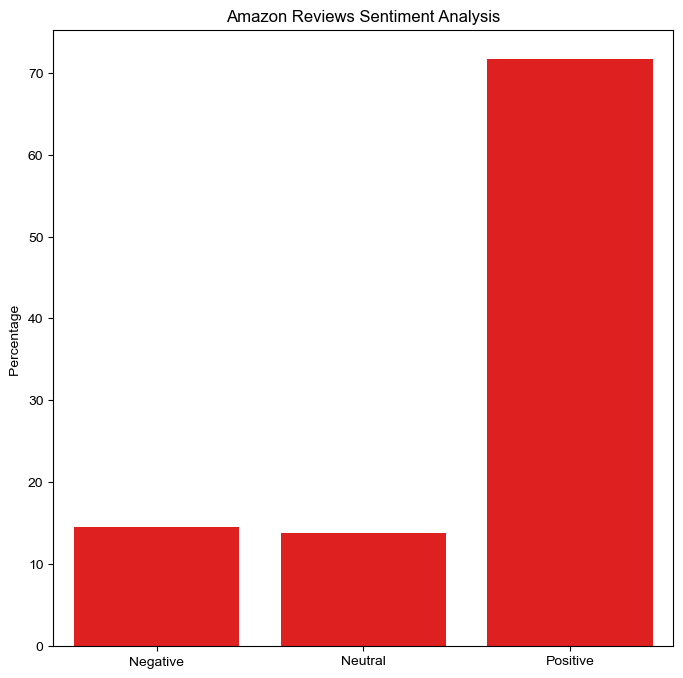

<Figure size 640x480 with 0 Axes>

In [14]:
#Calls the function "bar_graph", please change the second parameter to the name of your desired title
graph = bar_graph(df,'Amazon Reviews Sentiment Analysis')

#Saves the graph in Jupyter Notebook as a .png
plt.savefig('graph.png')

In [15]:
#Calls the function print_top_comments
#Add "df", the name of the column that stores the values of the sentiments, the name of the column that stores the 
#comments, the value you would like to see (-1,0, or 1), and how many comments you would like to see. 
print_top_comments(df,'label','lst', 1, 5)

-This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!
-Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card
-I have it in my phone and it never skips a beat. File transfers are speedy and have not had any corruption issues or memory fade issues as I would expect from the Sandisk brand. Great card to own. Why entrust your precious files to a slightly cheaper piece of crap? If you lose everything can you forgive yourself for not spending the extra couple bucks on a truste

In [16]:
#Calls the function save_top_comments_to_file
#Add "df", the name of the column that stores the values of the sentiments, the name of the column that stores the 
#comments, the value you would like to see (-1,0, or 1),how many comments you would like to see, and the name for
#your file
save_top_comments_to_file(df,'label','lst', 1, 5, 'top_comments.txt')


# Adding Context to Sentiment Analysis

First, we were only analyzing the answers to the questions, in this way, the sentiment analyzer has less nuance, as it does not have the context. Now, we will add the context to the answers to see if there is a difference in results.

In [17]:
def creates_dataframe_with_context(file, column_name, question):
     
    #Creates a list. A list can be created by writing the name of a variable (any name can be used)
    #We will store our csv file here, each row of the csv file will be read and stored in a different
    #component of the list.  
    
    lst = []  

     #Opens csv file, reads the file, and then attaches each row from the desired column, in this case "reviewText."

    with open(file, encoding = 'utf8') as csvfile:
        reader = csv.DictReader(csvfile)
        for element in reader:
            lst.append(element[column_name])

    # Initializes sentiment analyzer
    sia = SIA()

    # Creates a list to store results
    results = []

    # Iterate over each element in 'lst'
    for text in lst:
        # Adds the question with the text
        text_with_question = question + ' ' + text
        # Applies sentiment analysis on the added text
        pol_score = sia.polarity_scores(text_with_question)
        # Adds original text to the result dictionary
        pol_score['text'] = text_with_question  
        #Adds to the "results" list 
        results.append(pol_score)
        
    #Creates a dataframe
    df = pd.DataFrame.from_records(results)

    #Creates a column called "label," and then gives each different scores

    #First, gives all the value 0 (neutral)
    df['label'] = 0

    #Then if the compoud is 0.2 or more, considers the label as positive (1)
    df.loc[df['compound']> 0.2, 'label'] = 1

    #If the compound is less than -0.2, considers the label as negative (-1)
    df.loc[df['compound']<-0.2, 'label']= -1
    
    #Returns complete dataframe with polarity scores
    return df

In [18]:
#Calls the "creates_dataframe" function, and then stores it into a variable so we can use it throughout the code
#Please, change the name of the csv file to your csv file added to Jupyter Notebooks, the name of the column 
#you would like to add afterwards, and the question (context) that will be before the question.

df_context = creates_dataframe_with_context('amazon_reviews.csv', 'reviewText','How would you review our product?')

#Displays dataframe

df_context

,neg,neu,pos,compound,text,label
0,0.239,0.761,0.000,-0.2960,How would you review our product? No issues.,-1
1,0.062,0.937,0.000,-0.2960,How would you review our product? Purchased th...,-1
2,0.064,0.936,0.000,-0.3089,How would you review our product? it works as ...,-1
3,0.000,0.917,0.083,0.7081,How would you review our product? This think h...,1
4,0.035,0.851,0.115,0.7087,How would you review our product? Bought it wi...,1
...,...,...,...,...,...,...
4910,0.083,0.833,0.083,0.0018,How would you review our product? I bought thi...,0
4911,0.000,0.950,0.050,0.1761,How would you review our product? Used this fo...,0
4912,0.000,0.847,0.153,0.8588,How would you review our product? Great card t...,1
4913,0.000,0.835,0.165,0.5514,How would you review our product? Good amount ...,1


Now, let's compare the results with the ones with no context. 

In [19]:
#Calls the function "percentage" for the regular dataframe
percentage(df, 'label')

 1    71.658189
-1    14.526958
 0    13.814852
Name: label, dtype: float64

In [20]:
#Calls the function "percentage" for the dataframe with context
percentage(df_context, 'label')

 1    71.820956
-1    14.608342
 0    13.570702
Name: label, dtype: float64

We can see a small difference in the results, there are less neutral results in the code with context than in the regular dataframe. This might mean that with context, the sentiment analyzer is better in finding more polar results.